<a href="https://colab.research.google.com/github/AditiKamble06/Hackathon1/blob/main/Hackathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydantic==1.10.2 pandas-profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 15.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
<ipython-input-1-02681026af30>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

In [ ]:
train = pd.read_csv('./training_set_features.csv', index_col='respondent_id')
test = pd.read_csv('./test_set_features.csv', index_col='respondent_id')
labels = pd.read_csv('./training_set_labels.csv', index_col='respondent_id')

In [ ]:
num_cols = train.select_dtypes('number').columns

In [ ]:
cat_cols = ['race', 'sex',
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [ ]:
ord_cols = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [ ]:
assert len(num_cols)+len(cat_cols)+len(ord_cols) == train.shape[1]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
!pip install category_encoders catboost
from category_encoders import OrdinalEncoder as oe
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.5 MB/s eta 0:00:00


In [ ]:
for col in num_cols:
    train[col] = train[col].fillna(value=-1)

In [ ]:
for col in (cat_cols+ord_cols):
    train[col] = train[col].fillna(value='missing')

In [ ]:
for col in num_cols:
    test[col] = test[col].fillna(value=-1)

In [ ]:
for col in (cat_cols+ord_cols):
    test[col] = test[col].fillna(value='missing')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( train, labels, test_size=0.3, random_state=68)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
categorical_features_indices = np.where(X_train.dtypes != np.float64)[0]

In [ ]:
cat_cols = X_train.select_dtypes('object').columns

In [ ]:

ct = ColumnTransformer(
    [('ordinal', oe(), cat_cols)],
    remainder='passthrough')


In [ ]:
all_cols = X_train.columns

In [ ]:
sfs2 = SFS(CatBoostClassifier(n_estimators=100, verbose=False),
           k_features=X_train.shape[1],
           forward=True,
           floating=False,
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs2 = sfs2.fit(ct.fit_transform(X_train), np.array(y_train.xyz_vaccine))


[2024-06-17 09:58:30] Features: 1/35 -- score: 0.7071737862072726
[2024-06-17 09:59:07] Features: 2/35 -- score: 0.7867904926588798
[2024-06-17 09:59:45] Features: 3/35 -- score: 0.8253150889609768
[2024-06-17 10:00:25] Features: 4/35 -- score: 0.8440309523249974
[2024-06-17 10:01:05] Features: 5/35 -- score: 0.8534936433531038
[2024-06-17 10:01:45] Features: 6/35 -- score: 0.8556190861342821
[2024-06-17 10:02:26] Features: 7/35 -- score: 0.8568606170196883
[2024-06-17 10:03:06] Features: 8/35 -- score: 0.8577668805558126
[2024-06-17 10:03:48] Features: 9/35 -- score: 0.8585902860069364
[2024-06-17 10:04:29] Features: 10/35 -- score: 0.8596158992199779
[2024-06-17 10:05:09] Features: 11/35 -- score: 0.860385075671168
[2024-06-17 10:05:48] Features: 12/35 -- score: 0.8615399800469106
[2024-06-17 10:06:28] Features: 13/35 -- score: 0.8623362345259593
[2024-06-17 10:07:07] Features: 14/35 -- score: 0.8629683483669928
[2024-06-17 10:07:46] Features: 15/35 -- score: 0.863044543833656
[2024

In [ ]:
sfdf2 = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
sfdf2

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(28,)","[0.7050372019814923, 0.708107924020672, 0.7061...",0.707174,"(28,)",0.005078,0.003951,0.001975
2,"(21, 28)","[0.7925673159437187, 0.7833433373349339, 0.783...",0.78679,"(21, 28)",0.008038,0.006254,0.003127
3,"(21, 26, 28)","[0.8313456200855761, 0.8251577226635334, 0.814...",0.825315,"(21, 26, 28)",0.00898,0.006987,0.003494
4,"(21, 26, 27, 28)","[0.847351505250716, 0.8445369637216589, 0.8370...",0.844031,"(21, 26, 27, 28)",0.007483,0.005822,0.002911
5,"(10, 21, 26, 27, 28)","[0.8566289917244658, 0.85181434275838, 0.84798...",0.853494,"(10, 21, 26, 27, 28)",0.008103,0.006304,0.003152
6,"(10, 21, 25, 26, 27, 28)","[0.8585297824636395, 0.8524235226005294, 0.849...",0.855619,"(10, 21, 25, 26, 27, 28)",0.008516,0.006626,0.003313
7,"(10, 13, 21, 25, 26, 27, 28)","[0.8603900945836198, 0.8536972235702791, 0.852...",0.856861,"(10, 13, 21, 25, 26, 27, 28)",0.008017,0.006237,0.003119
8,"(10, 13, 14, 21, 25, 26, 27, 28)","[0.8616306577392138, 0.8530031161400731, 0.854...",0.857767,"(10, 13, 14, 21, 25, 26, 27, 28)",0.008237,0.006409,0.003204
9,"(10, 13, 14, 21, 25, 26, 27, 28, 30)","[0.8617569936401698, 0.8540397009867777, 0.853...",0.85859,"(10, 13, 14, 21, 25, 26, 27, 28, 30)",0.008659,0.006737,0.003369
10,"(2, 10, 13, 14, 21, 25, 26, 27, 28, 30)","[0.8617716937702979, 0.8568612551403539, 0.856...",0.859616,"(2, 10, 13, 14, 21, 25, 26, 27, 28, 30)",0.006618,0.005149,0.002575


In [ ]:
!nvidia-smi

Mon Jun 17 10:18:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
selected_columns2 = [all_cols[i] for i in
                     list((0, 3, 5, 6, 10, 12, 13, 14, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32))]

In [ ]:

selected_columns2

['xyz_concern',
 'behavioral_avoidance',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'doctor_recc_seasonal',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children']

In [ ]:
sfs3 = SFS(CatBoostClassifier(n_estimators=100, verbose=False),
           k_features=X_train.shape[1],
           forward=True,
           floating=False,
           verbose=2,
           scoring='roc_auc',
           cv=5)

In [ ]:
sfs3 = sfs3.fit(ct.fit_transform(X_train), np.array(y_train.seasonal_vaccine).ravel())


[2024-06-17 10:20:09] Features: 1/35 -- score: 0.7149885991744259
[2024-06-17 10:20:45] Features: 2/35 -- score: 0.7765633331259914
[2024-06-17 10:21:26] Features: 3/35 -- score: 0.8112647791212361
[2024-06-17 10:22:05] Features: 4/35 -- score: 0.8350634921231002
[2024-06-17 10:22:46] Features: 5/35 -- score: 0.8448719657872499
[2024-06-17 10:23:27] Features: 6/35 -- score: 0.8497427097567416
[2024-06-17 10:24:11] Features: 7/35 -- score: 0.8520676416647532
[2024-06-17 10:24:52] Features: 8/35 -- score: 0.8542702302687086
[2024-06-17 10:25:36] Features: 9/35 -- score: 0.8551402818869354
[2024-06-17 10:26:18] Features: 10/35 -- score: 0.8558541511959771
[2024-06-17 10:26:59] Features: 11/35 -- score: 0.856873166297311
[2024-06-17 10:27:39] Features: 12/35 -- score: 0.8577577140976885
[2024-06-17 10:28:21] Features: 13/35 -- score: 0.858018001050165
[2024-06-17 10:29:02] Features: 14/35 -- score: 0.8591003995854927
[2024-06-17 10:29:41] Features: 15/35 -- score: 0.8591500105215026
[2024

In [ ]:
sfdf3 = pd.DataFrame.from_dict(sfs3.get_metric_dict()).T
sfdf3

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(31,)","[0.704703565267395, 0.7271142898217366, 0.7135...",0.714989,"(31,)",0.009434,0.00734,0.00367
2,"(0, 31)","[0.7679320011500862, 0.7835694364577342, 0.778...",0.776563,"(0, 31)",0.006573,0.005114,0.002557
3,"(0, 22, 31)","[0.8104184876365729, 0.8124909430707303, 0.808...",0.811265,"(0, 22, 31)",0.002882,0.002242,0.001121
4,"(0, 22, 30, 31)","[0.8376559804485337, 0.8359961184588843, 0.829...",0.835063,"(0, 22, 30, 31)",0.00364,0.002832,0.001416
5,"(0, 10, 22, 30, 31)","[0.8444039677975848, 0.8481191776883267, 0.839...",0.844872,"(0, 10, 22, 30, 31)",0.004065,0.003163,0.001581
6,"(0, 10, 22, 30, 31, 32)","[0.8511115583668775, 0.8538326624496837, 0.845...",0.849743,"(0, 10, 22, 30, 31, 32)",0.003631,0.002825,0.001412
7,"(0, 10, 13, 22, 30, 31, 32)","[0.8524081368602645, 0.856257044278321, 0.8465...",0.852068,"(0, 10, 13, 22, 30, 31, 32)",0.004061,0.00316,0.00158
8,"(0, 10, 13, 22, 26, 30, 31, 32)","[0.854054197814836, 0.8574859114433583, 0.8482...",0.85427,"(0, 10, 13, 22, 26, 30, 31, 32)",0.004139,0.00322,0.00161
9,"(0, 10, 13, 22, 23, 26, 30, 31, 32)","[0.8534026739505463, 0.8598706152961472, 0.850...",0.85514,"(0, 10, 13, 22, 23, 26, 30, 31, 32)",0.004013,0.003122,0.001561
10,"(0, 10, 13, 22, 23, 26, 27, 30, 31, 32)","[0.8542955721679126, 0.8602336112708453, 0.851...",0.855854,"(0, 10, 13, 22, 23, 26, 27, 30, 31, 32)",0.004185,0.003256,0.001628


In [ ]:

print(sfdf3.loc[19, 'feature_idx'])

(0, 1, 3, 4, 6, 10, 13, 14, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32)


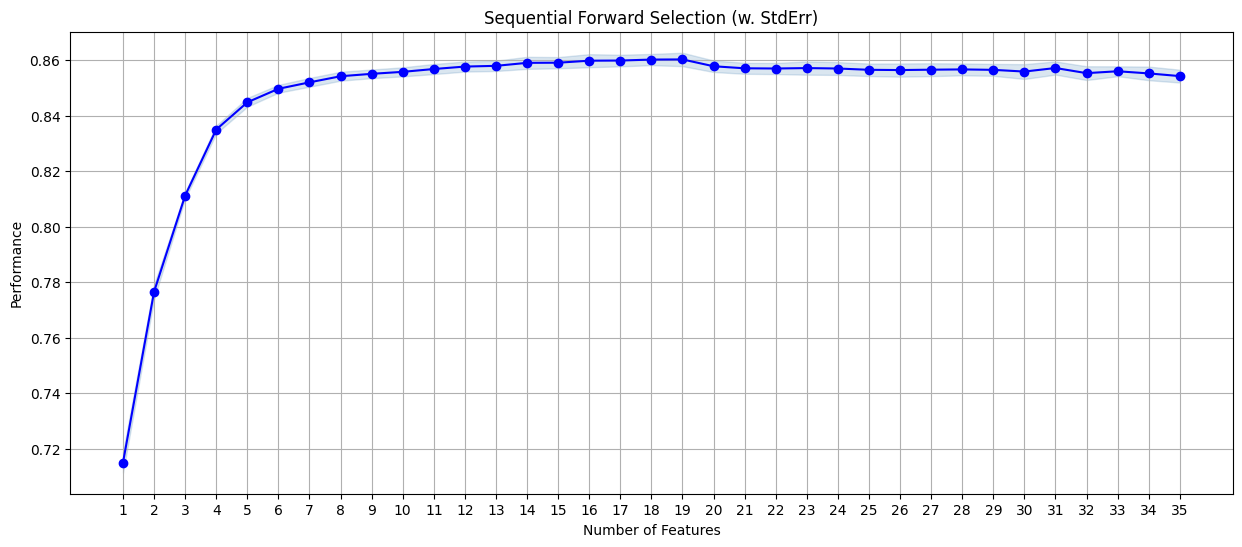

In [ ]:
fig = plot_sfs(sfs3.get_metric_dict(), kind='std_err', figsize=(15,6))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
selected_columns3 = [all_cols[i] for i in
                     list((0, 1, 4, 6, 10, 13, 14, 16, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32))]

In [ ]:

selected_columns3

['xyz_concern',
 'xyz_knowledge',
 'behavioral_face_mask',
 'behavioral_large_gatherings',
 'doctor_recc_seasonal',
 'health_worker',
 'health_insurance',
 'opinion_xyz_risk',
 'age_group',
 'education',
 'race',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children']

In [ ]:
selected_columns_xyz = selected_columns2
selected_columns_se = selected_columns3